# Neural Network Classification Problems

* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Binary Class Classification

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=10000

X,y= make_circles(n_samples,noise=0.03, random_state=42)

In [2]:
X[:5]

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       [ 0.98478298, -0.32517879],
       [ 0.82993028, -0.54722305]])

In [3]:
y[:5]

array([1, 0, 0, 0, 0])

### Visualizing the data

In [4]:
circles=pd.DataFrame({"X_0": X[:,0], "X_1": X[:,1], "label":y})
circles[:5]

,X_0,X_1,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0


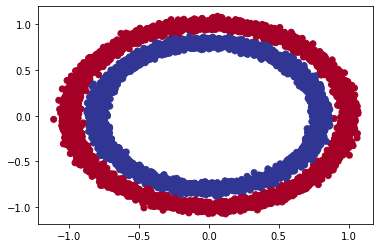

In [5]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
X.shape, y.shape

((10000, 2), (10000,))

In [7]:
len(X), len(y)

(10000, 10000)

In [8]:
X[:5]

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       [ 0.98478298, -0.32517879],
       [ 0.82993028, -0.54722305]])

In [9]:
y[:5]

array([1, 0, 0, 0, 0])

In [10]:
X[0], y[0]

(array([0.0464692 , 0.82477834]), 1)

In [11]:
X[1], y[1]

(array([ 1.00506323, -0.43335153]), 0)

In [12]:
X[2], y[2]

(array([-0.58348442,  0.79452834]), 0)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((7000, 2), (3000, 2), (7000,), (3000,))

In [14]:
model= tf.keras.Sequential([
          tf.keras.Input(shape=(2,)),
          tf.keras.layers.Dense(100, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


history=model.fit(X_train,y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 0.6842 - accuracy: 0.5133
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.7651
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.9230
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.9780
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.9907
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.9967
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.9984
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.9986
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.9984
Epoch 10/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.9997

In [15]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 1.0000


[0.22541342675685883, 1.0]

### Non_linear Activation Function

> All of the activation fuctions except the *linear* function are non-linear activation functions.

In [16]:
model_linear= tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation="linear"),
])

model_linear.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


history=model_linear.fit(X_train,y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 5.4336 - accuracy: 0.4803
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 5.1842 - accuracy: 0.4771
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 5.0014 - accuracy: 0.4770
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 4.9537 - accuracy: 0.4770
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 4.7664 - accuracy: 0.4733
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 4.7391 - accuracy: 0.4731
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 4.7091 - accuracy: 0.4719
Epoch 8/10
219/219 [==============================] - 0s 1ms/step - loss: 4.6848 - accuracy: 0.4710
Epoch 9/10
219/219 [==============================] - 0s 1ms/step - loss: 4.6779 - accuracy: 0.4711
Epoch 10/10
219/219 [==============================] - 0s 1ms/step - loss: 4.6730 - accuracy: 0.4713

In [17]:
model_linear.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 4.5500 - accuracy: 0.4700


[4.549979209899902, 0.4699999988079071]

In [18]:
model_1= tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


history=model_1.fit(X_train,y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5049
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5264
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5437
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5393
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.5620
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6753
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.7511
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.7836
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.5551 - accuracy: 0.7924
Epoch 10/100
219/219 [==============================] - 1s 2ms/step - loss: 0.5249 - accura

In [19]:
model_1.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9800


[0.05539841577410698, 0.9800000190734863]

### Improving the model

In [20]:
model_2= tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])


history=model_2.fit(X_train,y_train, epochs=25)

Epoch 1/25
219/219 [==============================] - 1s 2ms/step - loss: 0.6851 - accuracy: 0.5333
Epoch 2/25
219/219 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.5929
Epoch 3/25
219/219 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6376
Epoch 4/25
219/219 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.7097
Epoch 5/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7794
Epoch 6/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.7901
Epoch 7/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8006
Epoch 8/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8054
Epoch 9/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8110
Epoch 10/25
219/219 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8141

In [21]:
model_2.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9727


[0.09570568054914474, 0.9726666808128357]

### Plot the loss or training curves

In [22]:
history.history

{'accuracy': [0.5332857370376587,
  0.5928571224212646,
  0.6375714540481567,
  0.7097142934799194,
  0.7794285416603088,
  0.790142834186554,
  0.8005714416503906,
  0.8054285645484924,
  0.8109999895095825,
  0.8141428828239441,
  0.8152857422828674,
  0.819428563117981,
  0.8225714564323425,
  0.8254285454750061,
  0.8448571562767029,
  0.8518571257591248,
  0.8684285879135132,
  0.8735714554786682,
  0.8785714507102966,
  0.8848571181297302,
  0.8914285898208618,
  0.8897143006324768,
  0.897857129573822,
  0.9632856845855713,
  0.9810000061988831],
 'loss': [0.6851195096969604,
  0.6531911492347717,
  0.6136822700500488,
  0.5481196045875549,
  0.46789446473121643,
  0.4489942193031311,
  0.43126794695854187,
  0.4210314154624939,
  0.41536059975624084,
  0.40797457098960876,
  0.40267413854599,
  0.39859044551849365,
  0.39555975794792175,
  0.39009860157966614,
  0.3531987965106964,
  0.3126855492591858,
  0.28146469593048096,
  0.2676689028739929,
  0.26329466700553894,
  0.248

In [23]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.685120,0.533286
1,0.653191,0.592857
2,0.613682,0.637571
3,0.548120,0.709714
4,0.467894,0.779429
5,0.448994,0.790143
6,0.431268,0.800571
7,0.421031,0.805429
8,0.415361,0.811000
9,0.407975,0.814143


Text(0.5, 1.0, 'Model_2 Loss Curve')

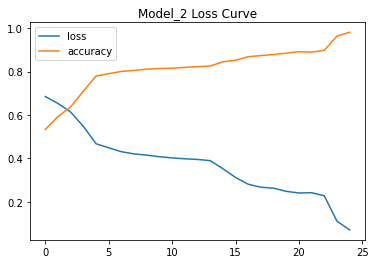

In [24]:
pd.DataFrame(history.history).plot()
plt.title("Model_2 Loss Curve")

### Find the ideal/best learning rate

**Steps**

* Learning rate **callback** is an extra piece of functionality, which we can add *while* the model is training.

* Build another model

* Modified lost curve plot

In [25]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

lr_callback=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_3=model_3.fit(X_train,y_train, epochs=100, callbacks=[lr_callback])

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4989 - lr: 1.0000e-04
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5046 - lr: 1.1220e-04
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5221 - lr: 1.2589e-04
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5264 - lr: 1.4125e-04
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5334 - lr: 1.5849e-04
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5361 - lr: 1.7783e-04
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5449 - lr: 1.9953e-04
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5494 - lr: 2.2387e-04
Epoch 9/100
219/219 [==============================] - 0

In [26]:
model_3.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 1.0935 - accuracy: 0.4870


[1.0934902429580688, 0.4869999885559082]

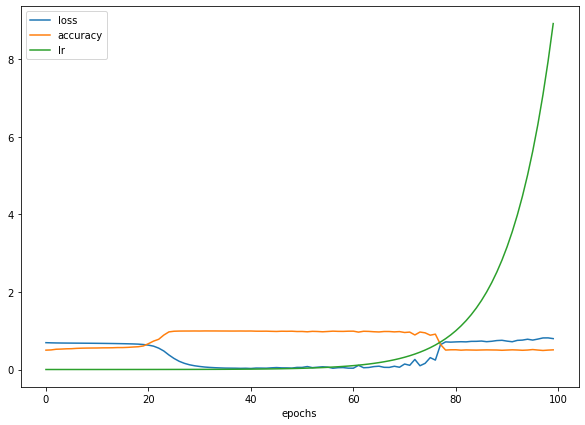

In [27]:
pd.DataFrame(history_3.history).plot(figsize=(10,7), xlabel="epochs")

### Learning rate VS Loss

In [28]:
lrs=  1e-4 *(10** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [29]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate VS Loss')

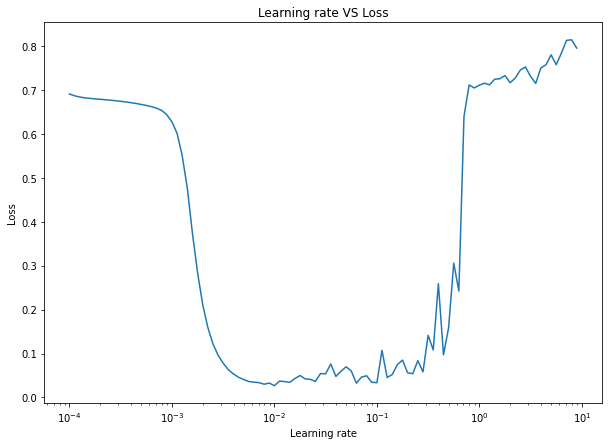

In [30]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate VS Loss")

### Examples of some usual learning rate

In [31]:
10**0, 10**-1, 10**-2,10**-3,10**-4, 1e-4 

(1, 0.1, 0.01, 0.001, 0.0001, 0.0001)

In [32]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_4.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), metrics=["accuracy"])

history_4=model_4.fit(X_train,y_train, epochs=25)

Epoch 1/25
219/219 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8141
Epoch 2/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9790
Epoch 3/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9859
Epoch 4/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9821
Epoch 5/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9809
Epoch 6/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9890
Epoch 7/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9847
Epoch 8/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9876
Epoch 9/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9899
Epoch 10/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9866

In [33]:
model_4.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9733


[0.07235588133335114, 0.9733333587646484]

### Confusion Matrix

In [34]:
y_preds= model_4.predict(X_test)
y_preds

array([[9.9988073e-01],
       [9.9988073e-01],
       [1.4587890e-07],
       ...,
       [8.4691346e-03],
       [9.9987620e-01],
       [9.9988073e-01]], dtype=float32)

#### Probability Predictions

> Looks like the *y_preds* are in the form of *prediction_probability*, we need to change it in the shape of *y_test*. THis is the standard output from the *sigmoid* or *softmax* activation function.

In [35]:
y_preds_standard= np.round(y_preds)
y_preds_standard[:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [36]:
y_preds_tf= tf.round(y_preds)
y_preds_tf[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [37]:
y_test.shape, y_preds.shape,y_preds_tf.shape

((3000,), (3000, 1), TensorShape([3000, 1]))

In [38]:
y_test[:5]

array([1, 1, 0, 1, 0])

In [39]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_preds_tf)
cm

array([[1467,   72],
       [   8, 1453]])

### Using Seaborn Library

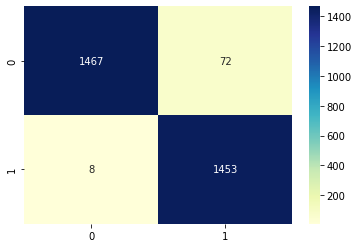

In [40]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

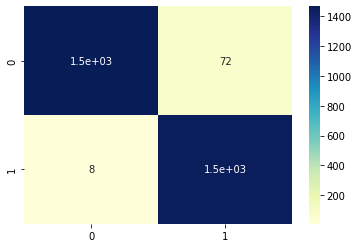

In [41]:
sns.heatmap(cm, annot=True, cmap="YlGnBu")

## Multi-class Classification

> When there are more than two classes.

In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import PIL
import PIL.Image

import matplotlib.pyplot as plt

### Getting data ready

In [43]:
(X_train,y_train), (X_test,y_test)=fashion_mnist.load_data()

In [44]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [45]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [46]:
X_train[0].shape

(28, 28)

In [47]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

#### Visualizing an image

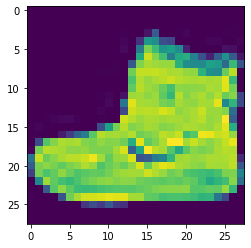

In [48]:
plt.imshow(X_train[0])

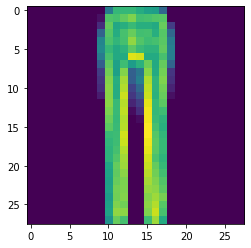

In [49]:
plt.imshow(X_train[69])

In [50]:
X_test[69]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  54,
        162, 186, 189, 138,   0,   0,   4,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0, 135, 227,
         44,   0,   0,  94, 239,  47,   0,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   1,   0,   0,   0,   2,   0,  69, 184,   0,
          0,   0,   0,   0,  21, 162,  25,   0,   1,   0,   1,   0,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,   1, 126,  40,   0,
          3,   1,   0,   0,   0,  83, 147,   0,   0,   1,   0,   0,   1,
          2,   0],
       [  2,   1,   0,   0,   0,   0,   0,   5,   0,  85, 173,   0,   0,
          2,   1,   0,   3,   0,   0, 136,  20,   0,   2,   0,   0,   1,
          0,   0],
       [  

In [51]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names,len(class_names)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

Text(0.5, 1.0, 'Dress')

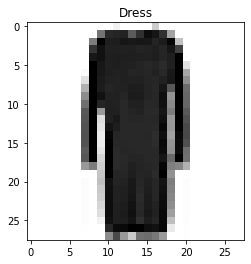

In [52]:
index=25
plt.imshow(X_train[index], cmap=plt.cm.binary)
plt.title(class_names[y_train[index]])

### Building

* Input Shape = (28,28)
* Output Shape= (10)
* Loss Function = "CategoricalCrossentropy"
* Output Activation Function = "Softmax"

In [53]:
X_train[0].shape, X_train.shape

((28, 28), (60000, 28, 28))

In [54]:
class_names, len(class_names)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

In [55]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [56]:
tf.one_hot(X_train[:10], depth=10)

<tf.Tensor: shape=(10, 28, 28, 10), dtype=float32, numpy=
array([[[[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ...,

### Building the model

> We have to use *SparseCategoricalCrossentropy()* as the loss function instead of *CategoricalCrossentropy* because the labels(y values) are in *integer* format and not *one-hot-encoded*. 

> If the labels were *one-hot-encoded* then we could have used the *CategoricalCrossentropy* as the loss function here.

In [57]:
tf.random.set_seed(42)

model_5= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_5= model_5.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_ac

In [58]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [59]:
X_train.min(), X_train.max()

(0, 255)

### Scalling/Normalizing the data

> Neural Networks tend to prefer data in numerical form as well as scaled/normalized(numbers between 0 & 1).


In [60]:
X_train/255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [61]:
X_train_scaled=X_train/255.0
X_test_scaled= X_test/255.0

In [62]:
X_train_scaled.min(), X_train_scaled.max(), X_test_scaled.min(), X_test_scaled.max()

(0.0, 1.0, 0.0, 1.0)

In [63]:
tf.random.set_seed(42)

model_5_scaled= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_5_scaled.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_5_scaled= model_5_scaled.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

### Plotting Loss curves of None Normalized data VS Normalized data

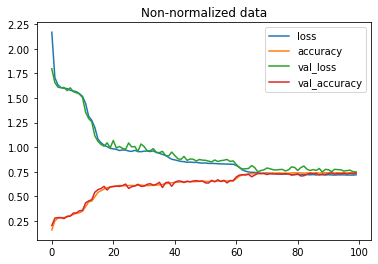

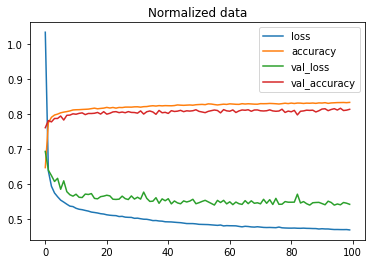

In [64]:
# None Normalized data
pd.DataFrame(history_5.history).plot(title="Non-normalized data")
# Normalized data
pd.DataFrame(history_5_scaled.history).plot(title="Normalized data")

### Finding ideal learning rate

In [65]:
tf.random.set_seed(42)

model_6= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(4, activation='relu'),
            tf.keras.layers.Dense(4, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
])

model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

lr_callback= tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

history_6_lr=model_6.fit(X_train,y_train, epochs=25, validation_data=(X_test_scaled,y_test), callbacks=[lr_callback])

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 2.3423 - val_accuracy: 0.0999 - lr: 0.0010
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7058 - accuracy: 0.2488 - val_loss: 2.8304 - val_accuracy: 0.1001 - lr: 0.0011
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6401 - accuracy: 0.2788 - val_loss: 3.0426 - val_accuracy: 0.1007 - lr: 0.0013
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6185 - accuracy: 0.2823 - val_loss: 3.0643 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6065 - accuracy: 0.2955 - val_loss: 2.9663 - val_accuracy: 0.1009 - lr: 0.0016
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5908 - accuracy: 0.3097 - val_loss: 2.5877 - val_accuracy: 0.1352 - lr: 0.0018
Epoch 7/25
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

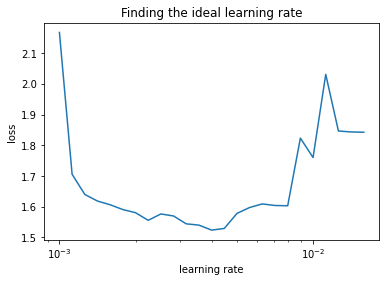

In [66]:
lrs=1e-3 *(10**(tf.range(25)/20))
plt.semilogx(lrs, history_6_lr.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Finding the ideal learning rate")

In [67]:
1e-3

0.001

### Rebuilding with ideal learning rate

In [68]:
tf.random.set_seed(42)

model_7_scaled= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_7_scaled.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

history_7_scaled= model_7_scaled.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

In [69]:
model_7_scaled.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Evaluating the Mult-class Model

* Confusion Matrix
* Visualizations
* Train for longer or change the architecture
* Save and load the model

#### Confusion Matrix

In [70]:
y_preds= model_7_scaled.predict(X_test_scaled)
y_preds

array([[8.6003418e-12, 1.1714989e-10, 1.2804016e-07, ..., 8.7388672e-02,
        2.1373227e-04, 7.0409548e-01],
       [3.1615696e-06, 2.7094215e-16, 9.5101708e-01, ..., 0.0000000e+00,
        6.0240491e-03, 7.1262292e-34],
       [3.0739619e-05, 9.9892789e-01, 1.7527806e-07, ..., 7.1533272e-16,
        2.4089463e-08, 4.9142688e-08],
       ...,
       [4.6293318e-02, 3.7274140e-06, 6.5823250e-02, ..., 5.9385952e-35,
        6.8045408e-02, 1.9350215e-22],
       [6.7914079e-06, 9.9758101e-01, 1.4090655e-07, ..., 2.0348440e-15,
        1.1948688e-07, 1.6663913e-06],
       [8.7683489e-08, 2.5365271e-08, 2.1092774e-05, ..., 1.2754097e-03,
        3.3031104e-04, 3.2001964e-04]], dtype=float32)

In [71]:
y_preds[0]

array([8.60034179e-12, 1.17149887e-10, 1.28040156e-07, 1.09151735e-07,
       9.10305928e-08, 2.08301783e-01, 2.20868532e-10, 8.73886719e-02,
       2.13732274e-04, 7.04095483e-01], dtype=float32)

In [72]:
tf.argmax(y_preds[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [73]:
class_names[tf.argmax(y_preds[0])]

'Ankle boot'

In [74]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [75]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

#### Convert the prediction probabilities into integers

In [76]:
y_preds=y_preds.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

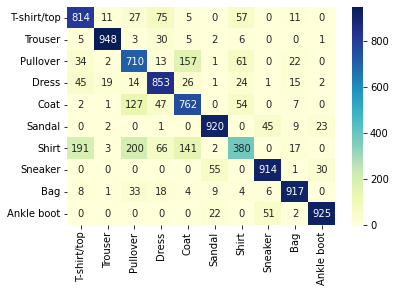

In [77]:
cm= confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_names, yticklabels=class_names)

#### Visualize the images randomly

In [78]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

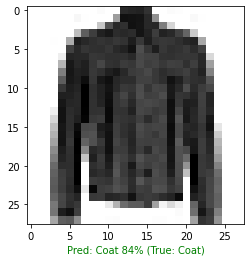

In [79]:
# Check out a random image as well as its prediction
plot_random_image(model=model_7_scaled, 
                  images=X_test_scaled, 
                  true_labels=y_test, 
                  classes=class_names)

### Finding patterns in model

In [80]:
model_7_scaled.layers

#### Getting a particular layer

In [81]:
model_7_scaled.layers[1]

##### Patterns of a layer

In [82]:
weights, biases = model_7_scaled.layers[1].get_weights()
weights, weights.shape

(array([[ 4.241446  , -3.012067  ,  0.49002635, -4.509878  ],
        [ 1.2100893 , -2.3324292 ,  0.0488535 , -1.0483685 ],
        [ 3.082372  , -2.068619  , -2.7418673 , -2.7358427 ],
        ...,
        [ 0.12459692,  0.6507043 ,  0.6821672 ,  0.8475341 ],
        [ 0.04273512,  1.816914  ,  1.4870257 , -1.1314937 ],
        [ 1.1600168 , -0.71845585,  0.52522826,  0.04715785]],
       dtype=float32), (784, 4))

In [83]:
model_7_scaled.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [84]:
biases, biases.shape

(array([ 0.42805952,  0.01240419, -0.12528071,  2.2919421 ], dtype=float32),
 (4,))

### Inputs and Outputs

In [85]:
from tensorflow.keras.utils import plot_model

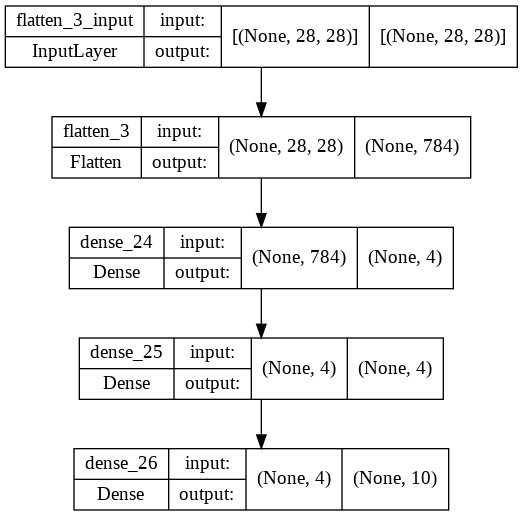

In [86]:
plot_model(model_7_scaled, show_shapes=True) # 'None' is batch_size